<a href="https://colab.research.google.com/github/Crazytiger0527/ML_4_1/blob/main/HW3_ROC%26AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMOTE 적용 전 분류 보고서:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.03      0.06       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.79      0.84      0.77      2874

SMOTE 적용 전 혼동 행렬:
[[2394   14]
 [ 451   15]]
SMOTE 적용 후 분류 보고서:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2408
           1       0.34      0.33      0.34       466

    accuracy                           0.79      2874
   macro avg       0.61      0.61      0.61      2874
weighted avg       0.79      0.79      0.79      2874

SMOTE 적용 후 혼동 행렬:
[[2111  297]
 [ 310  156]]


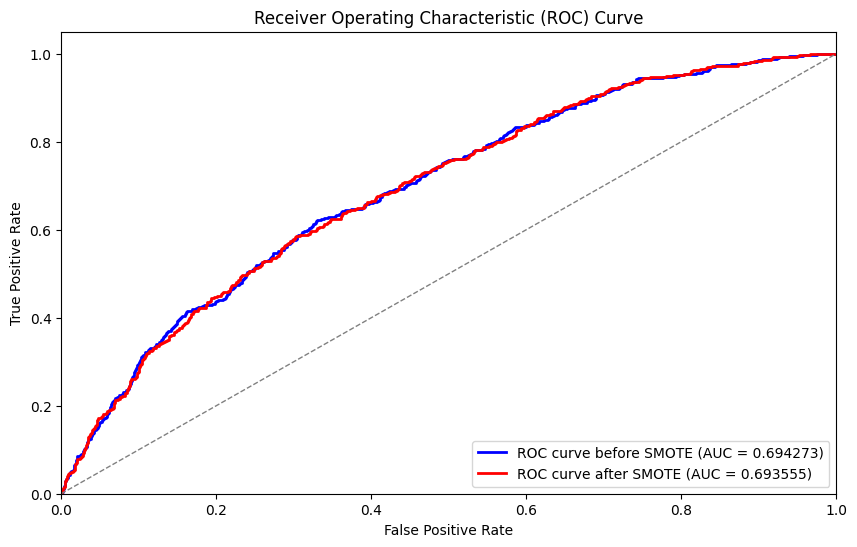

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 데이터 불러오기
loan_data = pd.read_csv('loan_data.csv')

# 데이터 준비 및 더미 변수 변환
X = pd.get_dummies(loan_data.drop('not.fully.paid', axis=1), columns=['purpose'], drop_first=True)
y = loan_data['not.fully.paid']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 훈련 (SMOTE 적용 전)
model_before_smote = LogisticRegression(random_state=42, max_iter=1000)
model_before_smote.fit(X_train_scaled, y_train)

# 테스트 세트로 평가 (SMOTE 적용 전)
predictions_before_smote = model_before_smote.predict(X_test_scaled)
print("SMOTE 적용 전 분류 보고서:")
print(classification_report(y_test, predictions_before_smote))
print("SMOTE 적용 전 혼동 행렬:")
print(confusion_matrix(y_test, predictions_before_smote))

# SMOTE 적용
smote = SMOTE(sampling_strategy=0.6, k_neighbors=6, random_state=42)
X_sm, y_sm = smote.fit_resample(X_train_scaled, y_train)

# 로지스틱 회귀 모델 훈련 (SMOTE 적용 후)
model_after_smote = LogisticRegression(random_state=42, max_iter=1000)
model_after_smote.fit(X_sm, y_sm)

# 테스트 세트로 평가 (SMOTE 적용 후)
predictions_after_smote = model_after_smote.predict(X_test_scaled)
print("SMOTE 적용 후 분류 보고서:")
print(classification_report(y_test, predictions_after_smote))
print("SMOTE 적용 후 혼동 행렬:")
print(confusion_matrix(y_test, predictions_after_smote))

# ROC curve 및 AUC 값 계산 및 시각화
# 테스트 세트에서 예측 확률 가져오기 (SMOTE 적용 전)
y_pred_prob_before_smote = model_before_smote.predict_proba(X_test_scaled)[:, 1]

# ROC curve 계산 (SMOTE 적용 전)
fpr_before_smote, tpr_before_smote, _ = roc_curve(y_test, y_pred_prob_before_smote)
roc_auc_before_smote = auc(fpr_before_smote, tpr_before_smote)

# 테스트 세트에서 예측 확률 가져오기 (SMOTE 적용 후)
y_pred_prob_after_smote = model_after_smote.predict_proba(X_test_scaled)[:, 1]

# ROC curve 계산 (SMOTE 적용 후)
fpr_after_smote, tpr_after_smote, _ = roc_curve(y_test, y_pred_prob_after_smote)
roc_auc_after_smote = auc(fpr_after_smote, tpr_after_smote)

# ROC curve 및 AUC 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr_before_smote, tpr_before_smote, color='blue', lw=2, label=f'ROC curve before SMOTE (AUC = {roc_auc_before_smote:.6f})')
plt.plot(fpr_after_smote, tpr_after_smote, color='red', lw=2, label=f'ROC curve after SMOTE (AUC = {roc_auc_after_smote:.6f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
